# 05. Random Variables, Expectations, Data, Statistics, Arrays and Tuples
## [Mathematical Statistical and Computational Foundations for Data Scientists](https://lamastex.github.io/scalable-data-science/360-in-525/2018/04/)

&copy;2018 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

### Topics

1. Continuous Random Variables
- Expectations
- Data and Statistics
- Sample Mean
- Sample Variance
- Order Statistics
- Frequencies
- Empirical Mass Function
- Empirical Distribution Function
- Arrays
- Tuples
 

# Random Variables

A random variable is a mapping from the sample space $\Omega$ to the set of real numbers $\mathbb{R}$.  In other words, it is a numerical value determined by the outcome of the experiment.

We already saw *discrete random variables* that take values in a discrete set, of two types:

- those with with finitely many values, eg. the two values in $\{0,1\}$ for the Bernoulli$(\theta)$ RV 
- those with *countably infinitely many* values, eg. values in the set of all non-negative integers: $\{0,1,2,\ldots\}$, for the 'infinite coin tossing experiment' that records the number of times you wait until the first Heads occurs.

Now, we will see the other main type of real-valued random variable.

## Continuous random variable

When a random variable takes on values in the continuum we call it a continuous RV.

### Examples

- Volume of water that fell on the Southern Alps yesterday (See video link below)
- Vertical position above sea level, in micrometers, since the original release of a pollen grain at the head waters of a river
- Resting position in degrees of a roulettet wheel after a brisk spin

## Probability Density Function

A RV $X$ with DF $F$ is called continuous if there exists a piece-wise continuous function $f$, called the  probability density function (PDF) $f$ of $X$, such that, for any $a$, $b \in \mathbb{R}$ with $a < b$,

$$
P(a < X \le b) = F(b)-F(a) = \int_a^b f(x) \ dx \ .
$$


The following hold for a continuous RV $X$ with PDF $f$:

For any $x \in \mathbb{R}$, $P(X=x)=0$.
Consequentially, for any $a,b \in \mathbb{R}$ with $a \le b$ 
$$P(a < X < b ) = P(a < X \le b) = P(a \leq X \le b) = P(a \le X < b)$$
By the fundamental theorem of calculus, except possibly at finitely many points (where the continuous pieces come together in the piecewise-continuous $f$): 
$$f(x) = \frac{d}{dx} F(x)$$
And of course $f$ must satisfy:
$$\int_{-\infty}^{\infty} f(x) \ dx = P(-\infty < X < \infty) = 1$$


### You try at home
Watch the Khan Academy [video about probability density functions](https://youtu.be/Fvi9A_tEmXQ) to warm-up to the meaning behind the maths above. Consider the continuous random variable $Y$ that measures the exact amount of rain tomorrow in inches. Think of the probability space $(\Omega,\mathcal{F},P)$ underpinning this random variable $Y:\Omega \to \mathbb{Y}$. Here the sample space, range or support of the random variable $Y$ denoted by $\mathbb{Y} = [0,\infty) =\{y : 0 \leq y < \infty\}$.


## The Uniform$(0,1)$ RV

The Uniform$(0,1)$ RV is a continuous RV with a probability density function (PDF) that takes the value 1 if $x \in [0,1]$ and $0$ otherwise.  Formally, this is written  


$$
\begin{equation}
f(x) = \mathbf{1}_{[0,1]}(x) =
\begin{cases}
1 & \text{if } 0 \le x \le 1 ,\\
0 & \text{otherwise}
\end{cases}
\end{equation}
$$


and its distribution function (DF) or cumulative distribution function (CDF) is:


$$
\begin{equation}
F(x) := \int_{- \infty}^x f(y) \ dy =
\begin{cases}
0 & \text{if } x < 0 , \\
x & \text{if } 0 \le x \leq 1 ,\\
1 & \text{if } x > 1
\end{cases}
\end{equation}
$$


Note that the DF is the identity map in $[0,1]$. 

The PDF, CDF and inverse CDF for a Uniform$(0,1)$ RV are shown below

<img src="images/Uniform01ThreeCharts.png" alt="Uniform01ThreeCharts" width=500>

The Uniform$(0,1)$ is sometimes called the Fundamental Model.

The Uniform$(0,1)$ distribution comes from the Uniform$(a,b)$ family.   

$$
\begin{equation}
f(x) = \mathbf{1}_{[a,b]}(x) =
\begin{cases}
\frac{1}{(b-a)} & \text{if } a \le x \le b,\\
0 & \text{otherwise}
\end{cases}
\end{equation}
$$

This is saying that if $X$ is a Uniform$(a,b)$ RV, then all values of $x$ between $a$ and $b$, i.e., $a \le x \le b$, are equally probable.   The Uniform$(0,1)$ RV is the member of the family where $a=0$, $b=1$.    

 The PDF and CDF for a Uniform$(a,b)$ RV are shown from wikipedia below

<table style="width:95%">
  <tr>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png" alt="500px-Uniform_Distribution_PDF_SVG.svg.png" width=250></th>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Uniform_cdf.svg/500px-Uniform_cdf.svg.png" alt="wikipedia image 500px-Uniform_cdf.svg.png" width=250></th> 
  </tr>
</table>

You can dive deeper into this family of random vaiables <a href="https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)">here</a>.

SageMath has a function for simulating samples from a Uniform$(a,b)$ distribution.  We will learn more about this later in the course. Let's go ahead and use it to simulate samples from it below.

In [3]:
uniform(-1,1)  # reevaluate the cell to see how the samples change upon each re-evaluation

-0.15206205043245413

# Expectations

The *expectation* of $X$ is also known as the *population mean*, *first moment*, or *expected value* of $X$.

$$
\begin{equation}
E\left(X\right) := \int x \, dF(x) =
\begin{cases}
\sum_x x \, f(x) & \qquad \text{if }X \text{ is discrete} \\
\int x \, f(x)\,dx  & \qquad \text{if } X \text{ is continuous}
\end{cases}
\end{equation}
$$

Sometimes, we denote $E(X)$ by $E X$ for brevity.  Thus, the expectation is a single-number summary of the RV $X$ and may be thought of  as the average.

In general though, we can talk about the Expectation of a function $g$ of a RV $X$.  

The Expectation of a function $g$ of a RV $X$ with DF $F$ is:

$$
\begin{equation}
E\left(g(X)\right) := \int g(x)\,dF(x) =
\begin{cases}
\sum_x g(x) f(x) & \qquad \text{if }X \text{ is discrete} \\
\int g(x) f(x)\,dx  & \qquad \text{if } X \text{ is continuous}
\end{cases}
\end{equation}
$$


provided the sum or integral is well-defined.  We say the expectation exists if


$$
\begin{equation}
\int \left|g(x)\right|\,dF(x) < \infty \ .
\end{equation}
$$

When we are looking at the Expectation of $X$ itself, we have $g(x) = x$

Thinking about the Expectations like this, can you see that the familiar Variance of X is in fact the Expection of $g(x) = (x - E(x))^2$?

The variance of $X$ (a.k.a. second moment)

Let $X$ be a RV with mean or expectation $E(X)$.  The variance of $X$ denoted by $V(X)$ or $VX$ is

$$
V(X) := E\left((X-E(X))^2\right) = \int (x-E(X))^2 \,d F(x)
$$

provided this expectation exists.  The standard deviation denoted by $\sigma(X) := \sqrt{V(X)}$.

Thus variance is a measure of ``spread'' of a distribution.

The $k$-th moment of a RV comes from the Expectation of $g(x) = x^k$.

We call

$$
E(X^k) = \int x^k\,dF(x)
$$


the $k$-th moment of the RV $X$ and say that the $k$-th moment exists when $E(|X|^k) < \infty$.  


## Properties of Expectations



1. If the $k$-th moment exists and if $j<k$ then the $j$-th moment exists.
- If $X_1,X_2,\ldots,X_n$ are RVs and $a_1,a_2,\ldots,a_n$ are constants, then $E \left( \sum_{i=1}^n a_i X_i \right) = \sum_{i=1}^n a_i E(X_i)$
- Let $X_1,X_2,\ldots,X_n$ be independent RVs, then 
  - $E \left(  \prod_{i=1}^n X_i \right) = \prod_{i=1}^{n} E(X_i)$
  - $V(X) = E(X^2) - (E(X))^2$
- If $a$ and $b$ are constants, then: $V \left(aX + b\right) = a^2V(X) $
- If $X_1,X_2,\ldots,X_n$ are independent and $a_1,a_2,\ldots,a_n$ are constants, then: $V \left(  \sum_{i=1}^n a_i X_i \right) = \sum_{i=1}^n a_i^2 V(X_i)$

### You try at home

Watch the Khan Academy videos about [probability density functions](https://youtu.be/Fvi9A_tEmXQ) and [expected value](https://youtu.be/j__Kredt7vY) if you want to get another angle on the material more slowly step-by-step:

## The population mean and variance of the Bernoulli$(\theta)$ RV

We have already met the discrete Bernoulli$(\theta)$ RV.  Remember, that if we have an event $A$ with $P(A) = \theta$, then a Bernoulli$(\theta)$ RV $X$ takes the value $1$ if "$A$ occurs" with probability $\theta$ and $0$ if "$A$ does not occur" with probability $1-\theta$. 

In other words, the indicator function $\mathbf{1}_A$ of "$A$ occurs" with probability $\theta$ is the Bernoulli$(\theta)$ RV. 

For example, flip a fair coin.  
Consider the event that it turns up heads.  Since the coin is fair, the probability of this event $\theta$ is $\frac{1}{2}$.  If we define an RV $X$ that takes the value 1 if the coin turns up heads ("event coin turns up heads occurs") and 0 otherwise, then we have a Bernoulli$(\theta = \frac{1}{2})$ RV.  

We all saw that given a parameter $\theta \in [0,1]$, the probability mass function (PMF) for the Bernoulli$(\theta)$ RV $X$ is:

$$
f(x;\theta) = \theta^x (1-\theta)^{1-x} \mathbf{1}_{\{0,1\}}(x) =
\begin{cases}
\theta & \text{if } x=1 \ ,\\
1-\theta & \text{if } x=0 \ ,\\
0 & \text{otherwise}
\end{cases}
$$


and its DF is:

$$
\begin{equation}
F(x;\theta) =
\begin{cases}
1 & \text{if } 1 \le x \ ,\\
1-\theta & \text{if } 0 \le x < 1 \ ,\\
0 & \text{otherwise}
\end{cases}
\end{equation}
$$

Now let's look at some expectations:  the population mean and variance of an RV $X \thicksim$  Bernoulli$(\theta)$. 

Because $X$ is a discrete RV, our expectations use sums rather than integrals.

The first moment or expectation is: 

$$
\begin{array}{lcl} 
E(X) & = & \displaystyle\sum_{x=0}^{1}xf(x;\theta) \\ &=& (0 \times (1-\theta)) + (1 \times \theta)\\ &=& 0 + \theta\\ &=& \theta\\ 
\end{array}
$$

The second moment is: 
$$\begin{array}{lcl} 
E(X^2) &=& \displaystyle\sum_{x=0}^{1}x^2f(x;\theta) \\ 
&=& (0^2 \times (1-\theta)) + (1^2 \times \theta)\\ &=& 0 + \theta\\ &=& \theta
\end{array}
$$

The variance is: 
$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=& \theta - \theta^2\\ &=& \theta(1-\theta) 
\end{array}
$$

We can see that $E(X)$ and $V(X)$ will vary with the parameter $\theta$.  This is why we subscript $E$ and $V$ with $\theta$, to emphasise that the values depend on the parameter.

$$E_{\theta}(X) = \theta$$

$$V_{\theta}(X) = \theta(1-\theta)$$

We can use Sage to do a simple plot to see how $E_{\theta}(X)$ and $V_{\theta}(X)$ vary with $\theta$.

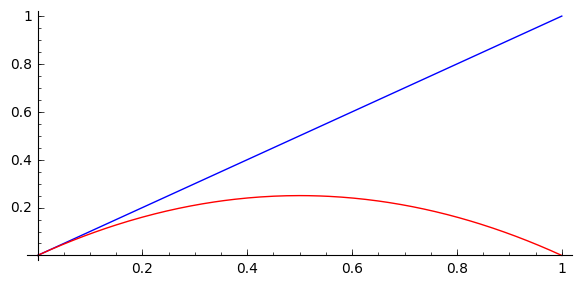

In [13]:
def bernoulliPopMean(th):
    '''A function to find the population mean for an RV distributed Bernoulli(theta).
    
    parameter th is the distribution parameter theta.'''
    
    return th
    
def bernoulliPopVariance(th):
    '''A function to find the population variance for an RV distributed Bernoulli(theta).
    
    parameter th is the distribution parameter theta.'''
    
    return th*(1-th)
    
p = plot(bernoulliPopMean(x), xmin=0, xmax=1) # assign the plot to p
p += plot(bernoulliPopVariance(x), xmin=0, xmax=1, rgbcolor="red") # add the variance plot to p
show(p, figsize=[6,3])

Note how the variance is maximized at $\theta=\frac{1}{2}$. 

## The population mean and variance of the Uniform$(0,1)$ RV

Now let's look at the the population mean and variance of a continuous RV $X \thicksim$ Uniform$(0,1)$. 

Because $X$ is a continuous RV, our expectations use integrals.

$$
\begin{array}{lcl} E(X) &=&\int_{x=0}^1 x f(x)\, dx\\ &=& \int_{x=0}^1 x \ 1 \, dx\\ &=& \frac{1}{2} \left( x^2 \right]_{x=0}^{x=1}\\ &=& \frac{1}{2} \left( 1-0 \right)\\ &=& \frac{1}{2} \end{array}
$$

 

$$
\begin{array}{lcl} E(X^2) &=& \int_{x=0}^1 x^2 f(x)\, dx \\ &=& \int_{x=0}^1 x^2 \ 1 \, dx\\ &=& \frac{1}{3} \left( x^3 \right]_{x=0}^{x=1}\\ &=& \frac{1}{3} \left( 1-0 \right)\\ &=& \frac{1}{3}\\ \end{array}
$$

$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=&\frac{1}{3} - \left( \frac{1}{2} \right)^2\\ &=& \frac{1}{3} - \frac{1}{4}\\ &=& \frac{1}{12} \end{array}
$$



### Winnings on Average

Think about playing a game where we draw $x \thicksim X$ and I pay you $r(x)$ ($r$ is some reward function, a function of $x$ that says what your reward is when $x$ is drawn).  Then, your average winnings from the game is the sum (or integral), over all the possible values of $x$, of $r(x) \times$ the chance that $X=x$.

Put formally, if $Y= r(X)$, then

$$E(Y) = E(r(X)) = \int r(x) \,dF(x)$$

## Probability is an Expectation

Remember when we first talked about the probability of some event $A$, we talked about the idea of the probability of $A$ as the long term relative frequency of $A$? 

Now consider some event $A$ and  a reward function $r(x) = \mathbf{1}_A(x)$.

Recall that $\mathbf{1}_A(x) = 1$ if $ x \in A$ and $\mathbf{1}_A(x) = 0$ if $ x \notin A$: the reward is 1 if $x \in A$ and 0 otherwise.

$$
\begin{array}{lcl} \text{If } X \text{ is continuous } E(\mathbf{1}_A(X)) &=& \int \mathbf{1}_A(x)\, dF(x)\\ &=& \int_A f(x)\, dx\\ &=& P(X \in A) = P(A)\\ \text{If } X \text{ is discrete } E(\mathbf{1}_A(X)) &=& \mathbf{1}_A(x)\, dF(x)\\ &=& \sum_{x \in A} f(x)\\ &=& P(X \in A) = P(A) \\ \end{array}
$$

This says that probability is a special case of expectation: the probability of $A$ is the expectation that $A$ will occur.

Take a Uniform$(0,1)$ RV X.  What would you say the probability that an observation of this random variable is $\le 0.5$ is, ie what is $P(X \le 0.5)$?

Let's use Sage to simulate some observations for us and look at the relative frequency of observations $\le 0.5$:

In [17]:
uniform(0,1) # remember calling this each time changes the outcome - reevaluate this cell and see

0.7036037270991756

In [15]:
countObOfInterest = 0    # variable to count observations of interest
numberOfObs = 1000        # variable to control how many observations we simulate
obOfInterest = 0.5        # variable for observation of interest
for i in range(numberOfObs): # loop to simulate observations
    if uniform(0,1) <= obOfInterest:    # conditional statement to check observation
        countObOfInterest += 1    # accumulate count of observation of interest
        
print "The relative frequency of x <=", obOfInterest.n(digits=2), \
      " was", RR(countObOfInterest/numberOfObs).n(digits=3)   # just formatting out print output

The relative frequency of x <= 0.50  was 0.482


Or, we could look at a similar simulation for a discrete RV, say a Bernoulli$(\frac{1}{2})$ RV. 

Another way of thinking about the $Bernoulli(\frac{1}{2})$ RV is that it has a discrete uniform distribution over $\{0,1\}$.  It can take on a finite number of values (0 and 1 only) and the probabilities of observing either of these two values are are equal.   

This could be modelling the event that we get a head when we throw a fair coin. For this we'll use the `randint(0,1)` function to simulate the observed value of our RV $X$. 

In [20]:
randint(0,1)

1

In [23]:
countObOfInterest = 0    # variable to count observations of interest
numberOfObs = 1000        # variable to control how many observations we simulate
obOfInterest = 1        # variable for observation of interest
for i in range(numberOfObs): # loop to simulate observations
    if randint(0,1) == obOfInterest:    # conditional statement to check observation
        countObOfInterest += 1    # accumulate count of observation of interest
        
print "The relative frequency of x ==", obOfInterest, \
      " was", RR(countObOfInterest/numberOfObs).n(digits=3)   # just formatting out print output

The relative frequency of x == 1  was 0.477


## The de Moivre$(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV

We have seen that a Bernoulli$(\theta)$ RV has two outcomes (0, and 1).  What if we are interested in modelling situations where there are more than two outcomes of interest? For example, we could use a $Bernoulli(\frac{1}{2})$ RV to model whether the outcome of the flip of a fair coin is a head, but we can't use it for modelling a RV which is the number we get when we toss a six-sided die.  

So, now, we will consider a natural generalization of the Bernoulli$(\theta)$ RV with more than two outcomes. This is called the de Moivre$(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV (after Abraham de Moivre, 1667-1754), one of the first great analytical probabalists).  

A de Moivre$(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV $X$ has a discrete uniform distribution over $\{1, 2, ..., k\}$:  there are $k$ possible equally probable ('equiprobable') values that the RV can take. 

If we are rolling a die and $X$ is the number on die, then $k=6$. 

Or think of the New Zealand Lotto game.  There are 40 balls in the machine, numbered $1, 2, \ldots, 40$.  The number on the first ball out of the machine can be modelled as a de Moivre$(\frac{1}{40}, \frac{1}{40}, \ldots, \frac{1}{40})$ RV. 

We say that an RV $X$ is de Moivre$(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ distributed if its probability mass function PMF is:

$$
f \left(x; \left( \frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k} \right) \right) = \begin{cases} 0 & \quad \text{if } x \notin \{1,2,\ldots,k\}\\ \frac{1}{k} & \quad \text{if } x \in \{1,2,\ldots,k\} \end{cases}
$$

We can find the expectation: 
$$
\begin{array}{lcl} E(X) & = & \sum_{x=1}^k xP(X=x)\\ &=& (1 \times \frac{1}{k}) + (2 \times \frac{1}{k}) + \ldots + (k \times \frac{1}{k})\\ &=& (1 + 2 + \dots + k)\frac{1}{k}\\ &=& \frac{k(k+1)}{2}\frac{1}{k}\\ &=& \frac{k+1}{2} \, , \end{array}
$$

the second moment: 
$$
\begin{array}{lcl} E(X^2) & =& \sum_{x=1}^k x^2P(X=x)\\ & =& (1^2 \times \frac{1}{k}) + (2^2 \times \frac{1}{k}) + \ldots + (k^2 \times \frac{1}{k})\\ &=& (1^2 + 2^2 + \dots + k^2)\frac{1}{k}\\ &=& \frac{k(k+1)(2k+1)}{6}\frac{1}{k}\\ &=& \frac{2k^2+3k+1}{6}\, , \end{array}
$$

and finally the variance: 
$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=& \frac{2k^2+3k+1}{6} - \left( \frac{k+1}{2} \right)^2\\ &=&\frac{2k^2+3k+1}{6} - \frac{k^2 + 2k +1}{4}\\ &=& \frac{4(2k^2 + 3k + 1) - 6(k^2 + 2k + 1) }{24}\\ &=& \frac{8k^2 + 12k + 4 - 6k^2 - 12k - 6 }{24}\\ &=& \frac{2k^2-2}{24} \\ &=& \frac{k^2-1}{12} \, . \end{array}
$$

We coud use the Sage `randint` function to simulate the number on the first ball in a Lotto draw:

In [24]:
randint(1,40)

13

## Real-world Data Ingestion

Let us download the New York Power Ball winning lottery numbers since 2010 from this US government site:

- [https://catalog.data.gov/dataset/lottery-powerball-winning-numbers-beginning-2010](https://catalog.data.gov/dataset/lottery-powerball-winning-numbers-beginning-2010)
    
using this url as a comma-separated-variable or csv file: 

- [https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD](https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD)

In [25]:
from urllib import * 
NYpowerball = urlopen('https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD').read().decode('utf-8')

In [29]:
type(NYpowerball) # this is a unicode sequence

<type 'unicode'>

In [57]:
NYpowerballLines = NYpowerball.split('\n') # this splits the unicode by the end of line character '\n' in a list

In [58]:
type(NYpowerballLines) # we have a list of lines now

<type 'list'>

In [60]:
NYpowerballLines[0:10] #  we can see the first 10 lines now and the first 0-index row is the header line

[u'Draw Date,Winning Numbers,Multiplier',
 u'02/03/2010,17 22 36 37 52 24,2',
 u'02/06/2010,14 22 52 54 59 04,3',
 u'02/10/2010,05 08 29 37 38 34,5',
 u'02/13/2010,10 14 30 40 51 01,4',
 u'02/17/2010,07 08 19 26 36 15,3',
 u'02/20/2010,13 27 37 41 54 32,2',
 u'02/24/2010,04 17 35 50 57 12,2',
 u'02/27/2010,18 47 51 53 58 30,2',
 u'03/03/2010,07 09 14 45 49 23,4']

In [62]:
len(NYpowerballLines) # looks like there are 853 items (lines) in the list 

853

In [63]:
NYpowerballLines[1] # this grabs the first row of data - the winning numbers from Feb 03 2010

u'02/03/2010,17 22 36 37 52 24,2'

In [64]:
NYpowerballLines[1].split(',') # this further split the row by comma character ',' into another list

[u'02/03/2010', u'17 22 36 37 52 24', u'2']

In [65]:
NYpowerballLines[1].split(',')[1] # this grabs the second element of the list with index 1

u'17 22 36 37 52 24'

In [66]:
NYpowerballLines[1].split(',')[1].split(' ') # this splits the 6 integers by white space ' '

[u'17', u'22', u'36', u'37', u'52', u'24']

In [67]:
NYpowerballLines[1].split(',')[1].split(' ')[0] # this grabs the first element of this list with 0-index

u'17'

In [68]:
int(NYpowerballLines[1].split(',')[1].split(' ')[0]) # now we can turn this string into a Python int

17

That was not too hard. But what we really want is the first winning number across all the draws. 

We can simply apply the expression in the last cell and loop it through each item say `line` in `NYpowerballLines`:

-  `int(line[1].split(',')[1].split(' ')[0])`

So let's do it.

In [69]:
firstWins = [] # initialize an empty list to append to it each winning first number
for line in NYpowerballLines:
    win1 = int(line.split(',')[1].split(' ')[0])
    firstWins.append(win1)

ValueError: invalid literal for int() with base 10: 'Winning'

Opps, we got a `ValueError: invalid literal for int() with base 10: 'Winning'`.

In [71]:
NYpowerballLines[0]   # remember our header line at index 0 has 'Winning' a string ad this can't be cast to int

u'Draw Date,Winning Numbers,Multiplier'

We need to handle such error carefully, as data downloaded from public sources will generally come woth such caveats and more complicated issues in general.

A proper way to handle such errors safely is called 'Exception Handling' using `try` and `catch`. Briefly from the [docs](https://docs.python.org/2/tutorial/errors.html#handling-exceptions):

> The `try` statement works as follows.
> 
> - First, the try clause (the statement(s) between the try and except keywords) is executed.
> - If no exception occurs, the except clause is skipped and execution of the try statement is finished.
> - If an exception occurs during execution of the try clause, the rest of the clause is skipped. Then if its type matches the exception named after the except keyword, the except clause is executed, and then execution continues after the try statement.
> - If an exception occurs which does not match the exception named in the except clause, it is passed on to outer try statements; if no handler is found, it is an unhandled exception and execution stops with a message as shown above.

In [93]:
# let's be cautious and process only the first 10 lines
firstWins = [] # initialize an empty list to append to it each winning first number
for line in NYpowerballLines[0:10]:
    try:
        win1 = int(line.split(',')[1].split(' ')[0])
        firstWins.append(win1)
    except ValueError:
        print "Err.. numbers only - input was: ", line

Err.. numbers only - input was:  Draw Date,Winning Numbers,Multiplier


In [94]:
firstWins # looks like we gracefully converted the first winning numbers for lines 2-10 indexed 1-9

[17, 14, 5, 10, 7, 13, 4, 18, 7]

In [95]:
# now let's bravely process all the lines
firstWins = [] # initialize an empty list to append to it each winning first number
for line in NYpowerballLines:
    try:
        win1 = int(line.split(',')[1].split(' ')[0])
        firstWins.append(win1)
    except ValueError:
        print "Err.. numbers only - line was: ", line       

Err.. numbers only - line was:  Draw Date,Winning Numbers,Multiplier


IndexError: list index out of range

Now we have a new error `IndexError: list index out of range`. But let's see how many numbers have been appended in our list `firstWins`.

In [96]:
len(firstWins)

851

In [97]:
NYpowerballRows[851] # this grabs the second last row of data - the winning numbers from Feb 03 2010

u'03/31/2018,08 24 52 55 61 21,3'

In [98]:
len(NYpowerballLines) # but there is another line at index 852

853

In [99]:
NYpowerballRows[852] # contents of the last line looks empty! this is our problem

u''

So, we need to handle this new exception.

From the [docs](https://docs.python.org/2/tutorial/errors.html#handling-exceptions) we note that:

> A `try` statement may have more than one `except` clause, to specify handlers for different exceptions. At most one handler will be executed....

Let's have an `except` clause for `IndexError` next.

In [100]:
# now let's bravely process all the lines
firstWins = [] # initialize an empty list to append to it each winning first number
for line in NYpowerballLines:
    try:
        win1 = int(line.split(',')[1].split(' ')[0])
        firstWins.append(win1)
    except ValueError:
        print "Err.. numbers only - line was: ", line
    except IndexError:
        print "list length had IndexError - line was: ", draw

Err.. numbers only - line was:  Draw Date,Winning Numbers,Multiplier
list length had IndexError - line was:  


In [101]:
len(firstWins) # now we got an exception-handled data processing done!

851

In [111]:
print firstWins[0:10], "...", firstWins[840:850] # the first and last 10 balls in our list

[17, 14, 5, 10, 7, 13, 4, 18, 7, 10] ... [24, 12, 13, 6, 43, 6, 22, 3, 10, 6]


# Python Pandas
We will next install a popular Python library for manipulating datasets as tables and dataframes.

See [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) for a quick start.

In [5]:
!sage -pip install pandas  # ! simply runs the following commands in shell

    100% |████████████████████████████████| 24.3MB 52kB/s  eta 0:00:01
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!pip install --upgrade pip

  Using cached pip-9.0.3-py2.py3-none-any.whl
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1
